In [1]:
#Se importan las librerias y herramientas necesarias 

import pandas as pd 
from itertools import combinations
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np 
import math

In [2]:
# Se selecciona el archivo y banda a trabajar

df = pd.read_excel('datos_para_lectura.xlsx', 
                   sheet_name='Simulated')  # Dataframe general
df2 = pd.DataFrame()  # Dataframe para almacenar resultados

# Visualización de datos cargados
df.head(10)

,St,TurbidezSonda_y,443nm,490nm,560nm,665nm,705nm,740nm,783nm,842nm,865nm
0,E1,3.1,0.007462,0.010213,0.014257,0.006412,0.004851,0.002260,0.002351,0.002786,0.002822
1,E2,3.2,0.004931,0.007060,0.010037,0.003937,0.002886,0.000997,0.001107,0.001438,0.001395
2,E3,6.2,0.009686,0.012731,0.017778,0.010792,0.008076,0.003127,0.003230,0.003433,0.003114
3,E6,9.0,0.011063,0.014644,0.020245,0.013489,0.011352,0.005955,0.006405,0.006519,0.006396
4,E7,10.8,0.015176,0.018909,0.025772,0.022527,0.019645,0.010014,0.009926,0.009066,0.007215
5,E9,5.8,0.010814,0.013843,0.018848,0.013443,0.011091,0.004838,0.004846,0.004741,0.003941
6,E10,13.8,0.017667,0.021172,0.027793,0.021768,0.018192,0.008360,0.008228,0.007733,0.006307
7,E12,3.4,0.007279,0.009200,0.011860,0.005167,0.003993,0.001843,0.001876,0.002075,0.001935
8,E24,9.9,0.007911,0.011092,0.015432,0.007703,0.006055,0.002488,0.002576,0.002734,0.002438
9,1ES,2.5,0.005022,0.007402,0.010714,0.005259,0.004033,0.001522,0.001608,0.001933,0.001780


In [3]:
# Se crean listas y DataFrames para almacenar datos de regresión

r2, b, m, st = [], [], [], []
stations = pd.DataFrame()
model = LinearRegression()

# Digitar el número de banda
banda = input('Por favor digite un número de banda valido: ')  

df = df[['St', 'TurbidezSonda_y', f'{banda}nm']]

# Se establece la combinatoria
comb = list(combinations(range(0, 21), 10))
print('El número total de combinaciones es de:', len(comb))

df.head(10)

El número total de combinaciones es de: 352716


,St,TurbidezSonda_y,665nm
0,E1,3.1,0.006412
1,E2,3.2,0.003937
2,E3,6.2,0.010792
3,E6,9.0,0.013489
4,E7,10.8,0.022527
5,E9,5.8,0.013443
6,E10,13.8,0.021768
7,E12,3.4,0.005167
8,E24,9.9,0.007703
9,1ES,2.5,0.005259


In [4]:
# Se realiza un bucle para recorrer los datos con un índice determinado por comb

for i in comb:
    ndf = df.loc[i, :]
    x = np.array(ndf[f'{banda}nm']).reshape((-1, 1))
    y = np.array(ndf['TurbidezSonda_y']).reshape((-1, 1))
    
    z = ";".join(ndf['St'].astype(str).str.strip()) #se corrige el formato de string    
    reg = model.fit(x, y)  # Regresión lineal

    r2.append(abs(reg.score(x, y)))  # Adición a lista r2
    b.append(float(reg.intercept_))  # Adición a lista b
    m.append(float(reg.coef_))  # Adición a lista m
    st.append(z)  # Adición a lista St  

In [5]:
# Para construir el dataframe con los datos de Estacion, R2, Intercepto y pendiente

df2 = pd.DataFrame({
    'Estaciones': st,
    'R2': r2,
    'Intercepto [b]': b,
    'Pendiente [m]': m
})

# Se visualizan los datos con redondeo de decimales para R2 en 4 dígitos
df2 = df2.round({'R2': 4})
df2.head(10)

,Estaciones,R2,Intercepto [b],Pendiente [m]
0,E1;E2;E3;E6;E7;E9;E10;E12;E24;1ES,0.7196,1.340771,491.354858
1,E1;E2;E3;E6;E7;E9;E10;E12;E24;E1S*,0.6112,-1.593935,867.120842
2,E1;E2;E3;E6;E7;E9;E10;E12;E24;E2S,0.7030,0.986627,509.989276
3,E1;E2;E3;E6;E7;E9;E10;E12;E24;E3S,0.6924,1.813833,467.305205
4,E1;E2;E3;E6;E7;E9;E10;E12;E24;E3S*,0.7797,1.675627,479.358589
5,E1;E2;E3;E6;E7;E9;E10;E12;E24;E5S,0.5600,2.592782,438.928757
6,E1;E2;E3;E6;E7;E9;E10;E12;E24;E5S*,0.7103,-0.002495,679.628951
7,E1;E2;E3;E6;E7;E9;E10;E12;E24;E9S,0.5162,2.735504,435.426647
8,E1;E2;E3;E6;E7;E9;E10;E12;E24;E10S,0.6975,1.793917,478.500254
9,E1;E2;E3;E6;E7;E9;E10;E12;E24;E11*S,0.7168,1.452956,484.696864


In [6]:
# Se determina el valor máximo y mínimo

min_df2, max_df2 = min(df2['R2']), max(df2['R2']) 

print('El valor mínimo de R2 es ->', min_df2)
print('El valor máximo de R2 es ->', max_df2)

El valor mínimo de R2 es -> 0.0211
El valor máximo de R2 es -> 0.9768


[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0]
21


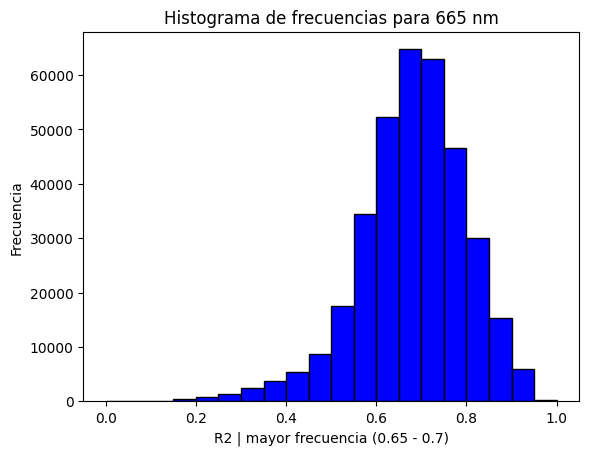

In [7]:
intervalos = list(np.arange(0, 1.01, 0.05))
rango1, rango2 = 0.65, 0.7

# Funciones de visualización de histograma

plt.hist(r2, color='blue', edgecolor='black', bins=intervalos)
plt.title(f'Histograma de frecuencias para {banda} nm')
plt.xlabel(f'R2 | mayor frecuencia ({rango1} - {rango2})')
plt.ylabel('Frecuencia')
plt.savefig(f"Histograma de frecuencias {banda} nm Simulated.jpg") #para guardar

print(intervalos)
print(len(intervalos))

In [8]:
# Se redondean los valores del intercepto y pendiente a 2 cifras

df2 = df2.round({'Intercepto [b]': 2, 'Pendiente [m]': 2})

# Se eliminan los índices que no tengan un valor de R2 tal que 0.6615 < R2 < 0.7216

df2 = df2.drop(df2[df2['R2'] > rango2].index)
df2 = df2.drop(df2[df2['R2'] < rango1].index)

# Se establece la moda para el intercepto (b) y la pendiente (m)

moda_b = pd.Series(df2[['Intercepto [b]']].values.flatten()).mode()[0]
moda_m = pd.Series(df2[['Pendiente [m]']].values.flatten()).mode()[0]

print('Moda para el intercepto (b):', moda_b)
print('Moda para la pendiente (m):', moda_m)

Moda para el intercepto (b): -1.8
Moda para la pendiente (m): 916.31


In [9]:
# Se establece la desviación cuadrática para la pendiente (m) y el intercepto (b)

df2['Desviacion cuadratica [b]'] = (df2['Intercepto [b]'] - moda_b) ** 2
df2['Desviacion cuadratica [m]'] = (df2['Pendiente [m]'] - moda_m) ** 2

# Se calcula el promedio para la desviación cuadrática en m y b

Media_DC_b = df2['Desviacion cuadratica [b]'].mean()
Media_DC_m = df2['Desviacion cuadratica [m]'].mean()

print('La media de la desviación cuadrática para el intercepto (b):', Media_DC_b)
print('La media de la desviación cuadrática para la pendiente (m):', Media_DC_m)

La media de la desviación cuadrática para el intercepto (b): 3.6810002666543356
La media de la desviación cuadrática para la pendiente (m): 42794.85488556675


In [10]:
# Se crean dos columnas basadas en condiciones

df2['Condicion 1'] = ''
df2['Condicion 2'] = ''

df2.loc[df2['Desviacion cuadratica [b]'] < Media_DC_b, 'Condicion 1'] = 'True'
df2.loc[df2['Desviacion cuadratica [m]'] < Media_DC_m, 'Condicion 2'] = 'True'

# Para exportar los datos en formato CSV

df2.to_csv('Resultados [R2, b, m, st].csv', index=False)

In [11]:
# Para el DataFrame final se tienen en cuenta solo los índices con dos datos de True

df_final = df2[df2['Condicion 1'] == 'True']
df_final = df_final[df_final['Condicion 2'] == 'True']

# Se organizan los datos con condición de R2 de forma descendente 

df_final = df_final.sort_values(by=['R2'], ascending=False)

In [12]:
#Para exportar los datos en formato CSV se utiliza

df_final.to_csv('Resultado preliminar.csv', index=False)

In [13]:
# En la presentación final se escogen solo los valores de R2 mayores

df_algoritmo = df_final[df_final['R2'] == max(df_final['R2'])]

# Los resultados son exportados en formato excel

df_algoritmo.to_excel(f'Algoritmo {banda} nm Simulated.xlsx', 
                      sheet_name=f'{banda} nm', index=False)